# Mục đích dự án: Chất lượng giấc ngủ ZZZ X_X
- Phân tích các yếu tổ ảnh hưởng đến giấc ngủ
- Đưa ra các nhận định khác quan dựa và thông tin từ biểu đổ đế đánh giá xem những nhân tố chủ yếu tác động đến giấc ngủ
-> công việc, thời gian ngủ, tình trạng vận động, BMI, mức độ căng thảng trong công việc v.v...
-> Dựa trên mô hình dự đoán

Hữu ích 
- Nếu trong vai trò là bác sĩ thì những chỉ số thông kê giúp họ đưa ra những giải pháp căn bản để vượt qua sức khoẻ ảnh hưởng lẫn giấc ngủ và đời sống
- Cải thiện những nhân tố (stress, BMI,... để sống tốt hơn :v)

Nhấn mạnh giấc ngủ liên quan đến sức khoẻ, sinh hoạt của tất cả mn:)

# Tiền xử lý dữ liệu
- Load dữ liệu từ CSV
- is null
- duplicate
- outlier
- formate code/ title


In [1112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd_new
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1113]:
df = pd_new.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [1114]:
# Loại bỏ những dòng có giá trị null (Giúp giảm sai lệch kết quả khi thống kê)
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [1115]:

df['Sleep Disorder'] = df['Sleep Disorder'].fillna("None")
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [1116]:
# Xóa dòng trùng nếu có
df = df.drop_duplicates()
df.shape


(374, 13)

In ra tổng quan về dữ liệu, describe, shape

In [1117]:
print("Shape:", df.shape)
df.info



Shape: (374, 13)


<bound method DataFrame.info of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6  

In [1118]:
# Describe cho các cột số (tổng quan nhanh)
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


=> So sánh không có dữ liệu ngoại lai vượt ngoài phạm vi (ngoại trừ nhịp tim 86)

In [1119]:
df.columns = (
    df.columns
    .str.strip() #Xoá khoảng trắng dư
    .str.lower() #Chuyển toàn bộ tên cột thành chữ thường
    .str.replace(" ", "_") #Thay khoảng trắng giữa các tên cột thành "_"
    .str.replace("/","_")
)

df.head()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [1120]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns 
numeric_cols


Index(['person_id', 'age', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps'],
      dtype='object')

In [1121]:
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25) #Tứ phân vị thứ nhất
    Q3 = data.quantile(0.75) #Tứ phân vị thứ 3
    IQR = Q3 - Q1 #Khoảng tứ phân vị
    lower = Q1 - 1.5 * IQR #Ngưỡng dưới để phát hiện outlier
    upper = Q3 + 1.5 * IQR #Ngưỡng trên để phát hiện outlier
    return ((data < lower) | (data > upper)).sum() #Lấy giá trị nằm trong đoạn đã xác định

In [1122]:
detect_outliers_IQR(df["heart_rate"])

np.int64(15)

In [1123]:
outlier_counts = df[numeric_cols].apply(detect_outliers_IQR) #Kiểm tra outlier của từng cột
outlier_counts

person_id                   0
age                         0
sleep_duration              0
quality_of_sleep            0
physical_activity_level     0
stress_level                0
heart_rate                 15
daily_steps                 0
dtype: int64

In [1124]:
#Tạo một hàm tổng quát để loại bỏ outlier
def remove_outliers_IQR(dataframe, columns):
    df_clean = dataframe.copy() #Tạo bản sao dữ liệu 
    for col in columns: #Duyệt qua từng số 
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR 
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_no_outlier = remove_outliers_IQR(df, numeric_cols)

df_no_outlier.shape


(359, 13)

# Phân tích mối quan hệ của các thuộc tính
- heatmap
- biểu đồ (cột/ đường/top 10) --> sau mỗi biểu đồ cần 1 kết luận

In [1125]:

# Map các cột category
gender_map = {"Male": 0, "Female": 1}
sleep_disorder_map = {"None": 0, "Insomnia": 1, "Sleep Apnea": 2}


In [1126]:
labels = df['occupation'].unique().tolist()
occupation_map = {v: i for i, v in enumerate(labels)}
occupation_map


{'Software Engineer': 0,
 'Doctor': 1,
 'Sales Representative': 2,
 'Teacher': 3,
 'Nurse': 4,
 'Engineer': 5,
 'Accountant': 6,
 'Scientist': 7,
 'Lawyer': 8,
 'Salesperson': 9,
 'Manager': 10}

In [1127]:
labels = df['bmi_category'].unique().tolist()
bmi_map = {v: i for i, v in enumerate(labels)}
bmi_map

{'Overweight': 0, 'Normal': 1, 'Obese': 2}

In [1128]:
# Tạo bản encode
df_encoded = df.copy()
df_encoded

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [1129]:
# Tách huyết áp tâm thu và tâm trương bằng lambda
df_encoded["tam_thu"] = df_encoded["blood_pressure"].apply(lambda x: int(x.split('/')[0]))
df_encoded["tam_truong"] = df_encoded["blood_pressure"].apply(lambda x: int(x.split('/')[1]))

#Tách cho các nhóm còn lại
df_encoded["gender"] = df_encoded["gender"].map(gender_map)
df_encoded["occupation"] = df_encoded["occupation"].map(occupation_map)
df_encoded["bmi_category"] = df_encoded["bmi_category"].map(bmi_map)
df_encoded["sleep_disorder"] = df_encoded["sleep_disorder"].map(sleep_disorder_map)
df_encoded["MABP"] = df_encoded.apply(
    lambda row: ((2 * row["tam_truong"] + row["tam_thu"]) / 3),
    axis=1
)



In [1130]:
df_encoded = df_encoded.drop(df_encoded.columns[[9]], axis=1)
df_encoded

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,tam_thu,tam_truong,MABP
0,1,0,27,0,6.1,6,42,6,0,77,4200,0,126,83,97.333333
1,2,0,28,1,6.2,6,60,8,1,75,10000,0,125,80,95.000000
2,3,0,28,1,6.2,6,60,8,1,75,10000,0,125,80,95.000000
3,4,0,28,2,5.9,4,30,8,2,85,3000,2,140,90,106.666667
4,5,0,28,2,5.9,4,30,8,2,85,3000,2,140,90,106.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000
370,371,1,59,4,8.0,9,75,3,0,68,7000,2,140,95,110.000000
371,372,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000
372,373,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000


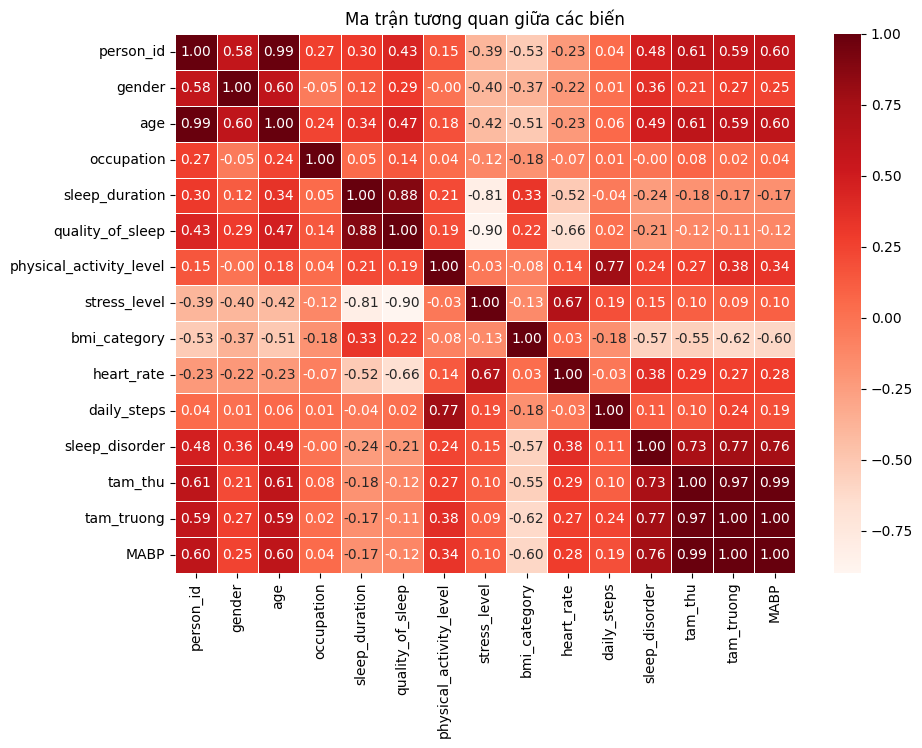

In [1131]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến")
plt.show()


# Train - test - prediction
- Tạo mô hình
- Chia tập train - test
- Train (fit)
- Đánh giá mô hình với R^2 + MSE với tập test
- Dự đoán (có thể vẽ mô hình)


Mối quan hệ giữa
Sleep duration - quality of sleep
stress_level với quality of sleep
physical activity level với quality of sleep

In [1132]:
# Tạo mô hình
model = LinearRegression()


X= df_encoded[["stress_level", "heart_rate" ]]
y = df_encoded.drop(columns=["quality_of_sleep"])

#Chia tập train : test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)



In [1133]:
#Khởi tạo và huấn luyện model (.fit là huấn luyện mô hình dựa trên những dữ liệu đã cung cấp)
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Tạo dựng hồi quy (dự đoán)
y_pred = model.predict(X_test[['sleep_duration','stress_level',"heart_rate"]])

In [1134]:
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
sleep_duration = model.coef_[0][0]
stress_level = model.coef_[0][1]
heart_rate = model.coef_[0][2]
print(f"Phương trình: y = {sleep_duration:.2f}x_sleep_duration + {stress_level:.2f}x_stress_level + {heart_rate:.2f}x_heart_rate + {model.intercept_:.2f} ")

Hệ số hồi quy (slope): [-30.14458378   1.16280318]
Hệ số chặn (intercept): [ 2.72092415e+02  5.40189466e-01  4.47674585e+01  1.63770037e+00
  8.62882888e+00 -3.90657318e+01 -8.88178420e-15 -8.65560119e-01
 -2.84217094e-14  1.30991604e+04 -5.60709947e+00  7.74006107e+01
  4.69185243e+01  5.70792198e+01]


IndexError: index 2 is out of bounds for axis 0 with size 2

## Tính chỉ số MSE + R^2 (đánh giá mô hình)

In [351]:
#Sai số trung bình
mse = mean_squared_error(y_true = y_test,y_pred= y_pred)
# Độ biến thiên y được giải thích bởi model
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true = y_test, y_pred = y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 (from model.score): {r2:.4f}")
print(f"R2 (from r2_score): {r2_sklearn:.4f}")

Mean Squared Error: 172501.1098
R^2 (from model.score): 0.5864
R2 (from r2_score): 0.5864


## Vẽ biểu đồ

In [928]:
df_test = pd_new.DataFrame({
    "thoi_gian_ngu": X_test["sleep_duration"],
    "quality_of_sleep_test": y_test,
    "quality_of_sleep_pred": y_pred
}).sort_values(by="thoi_gian_ngu")

plt.figure(figsize=(6,4))

sns.scatterplot(
    x="thoi_gian_ngu",
    y="quality_of_sleep_test",
    data=df_test,
    color="pink",
    label="Dữ liệu thực tế"
)

plt.plot(
    df_test["thoi_gian_ngu"],
    df_test["quality_of_sleep_pred"],
    color="purple",
    linewidth=2,
    label="Đường hồi quy tuyến tính"
)

plt.title("Mối quan hệ giữa thời gian ngủ và chất lượng giấc ngủ")
plt.xlabel("Thời gian ngủ (giờ)")
plt.ylabel("Chất lượng ngủ (điểm / 10)")
plt.legend()
plt.show()


ValueError: Per-column arrays must each be 1-dimensional

Kết luận:
- Chất lượng giấc ngủ ở điểm 7 có mật độ nhiều nhất
- Lượng người ngủ trong khoảng từ (6,5 tiếng đến 7 tiếng)
- Chất ngủ tỉ lệ thuận với thời gian ngủ

C:\Users\Windows\AppData\Local\Temp\ipykernel_15024\1950741364.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


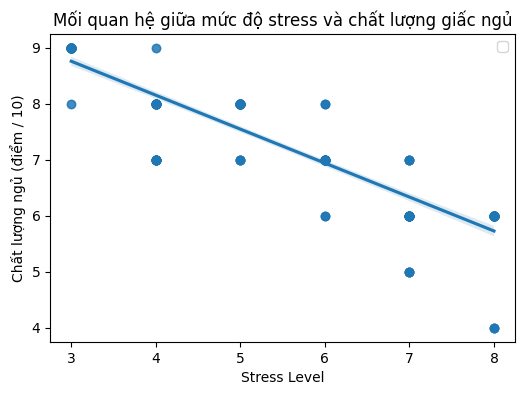

In [648]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='stress_level',
    y='quality_of_sleep',
    data=df,
    scatter_kws={'alpha':0.6}
)
plt.title('Mối quan hệ giữa mức độ stress và chất lượng giấc ngủ')
plt.xlabel('Stress Level')
plt.ylabel('Chất lượng ngủ (điểm / 10)')
plt.legend()
plt.show()


Kết luận
- Căng thẳng càng nhiều thì chất lượng ngủ càng ít
- Chất lượng ngủ tỉ lệ nghịch với chất lượng giấc ngủ

In [711]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='heart_rate',
    y='quality_of_sleep',
    data=df,
    scatter_kws={'alpha':0.6}
)
plt.title('Mức độ thể chất và chất lượng giấc ngủ')
plt.xlabel('MABP')
plt.ylabel('Quality of Sleep')
plt.legend()
plt.show()
# :(((

KeyError: 'MABP'

<Figure size 600x400 with 0 Axes>